Numerical Summary:
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680 

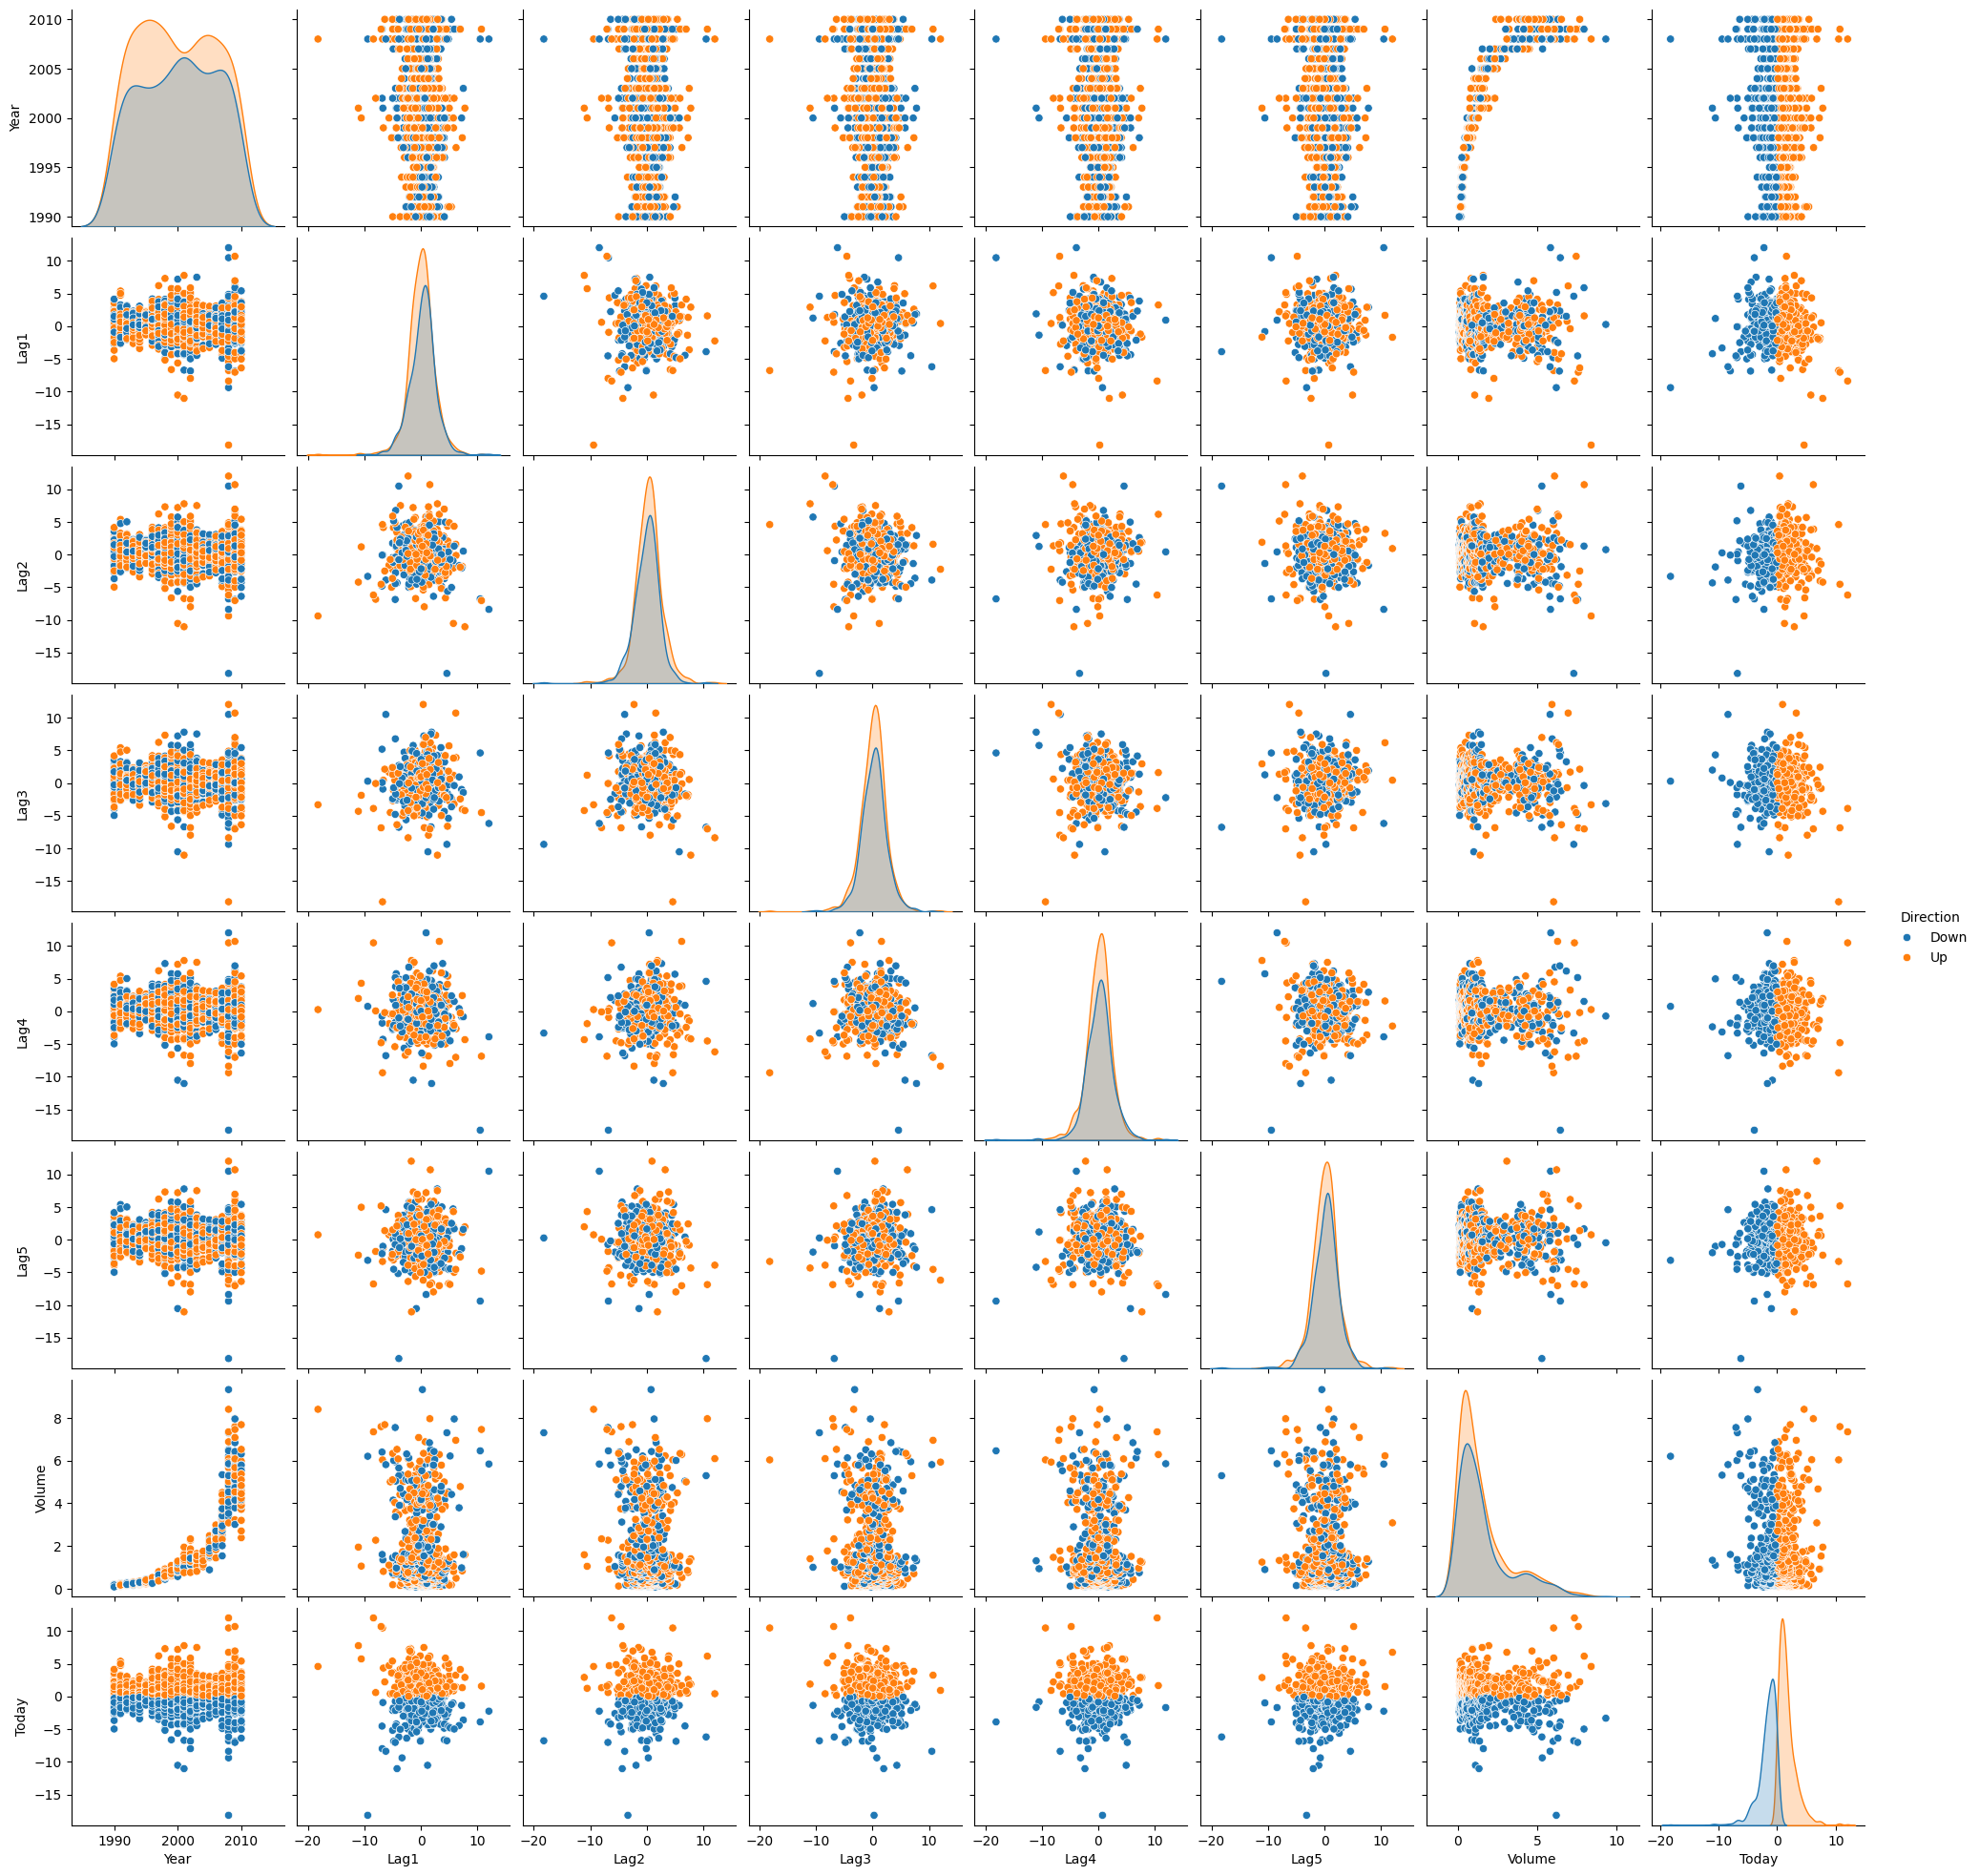

Correlation Matrix:
            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  
Optimization terminated successfully.
         Current function value: 0.682441
        

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
boston_data = pd.read_csv('/content/Weekly.csv')

# (a) Produce some numerical and graphical summaries of the Weekly data
print("Numerical Summary:")
print(boston_data.describe())

# Scatter plot matrix
sns.pairplot(boston_data, hue='Direction')
plt.show()

# Correlation matrix excluding non-numeric columns
correlation_matrix = boston_data.select_dtypes(include=[np.number]).corr()
print("Correlation Matrix:")
print(correlation_matrix)

# (b) Logistic regression with Direction as the response and five lag variables plus Volume as predictors
# Convert 'Direction' to binary: Up = 1, Down = 0
boston_data['Direction'] = boston_data['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

X = boston_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = boston_data['Direction']

# Add intercept term
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display model summary
print("Logistic Regression Summary:")
print(result.summary())

# (c) Compute confusion matrix and overall fraction of correct predictions
y_pred_prob = result.predict(X)
y_pred = (y_pred_prob > 0.5).astype(int)  # Set threshold at 0.5

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Proportion of correctly predicted upward trends
correct_up = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print(f"Correctly Predicted Up: {correct_up:.2f}")

# Proportion of correctly predicted downward trends
correct_down = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f"Correctly Predicted Down: {correct_down:.2f}")

# (d) Fit logistic regression model using training data from 1990 to 2008, using Lag2 as the only predictor
train = boston_data[boston_data['Year'] < 2009]
test = boston_data[boston_data['Year'] >= 2009]

# Use Lag2 as the only predictor
X_train = train[['Lag2']]
y_train = train['Direction']

# Add intercept term
X_train = sm.add_constant(X_train)

# Fit model
model_lag2 = sm.Logit(y_train, X_train)
result_lag2 = model_lag2.fit()

# Predict for the test data from 2009 and 2010
X_test = test[['Lag2']]
y_test = test['Direction']
X_test = sm.add_constant(X_test)

y_pred_test_prob = result_lag2.predict(X_test)
y_pred_test = (y_pred_test_prob > 0.5).astype(int)

# Calculate confusion matrix for test predictions
conf_matrix_lag2 = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Lag2):")
print(conf_matrix_lag2)

# Calculate overall accuracy for test predictions
overall_accuracy_lag2 = accuracy_score(y_test, y_pred_test)
print(f"Overall Accuracy (Lag2): {overall_accuracy_lag2:.2f}")

# Proportion of correctly predicted upward trends in test data
correct_up_lag2 = conf_matrix_lag2[1, 1] / (conf_matrix_lag2[1, 1] + conf_matrix_lag2[1, 0])
print(f"Correctly Predicted Up (Lag2): {correct_up_lag2:.2f}")

# Proportion of correctly predicted downward trends in test data
correct_down_lag2 = conf_matrix_lag2[0, 0] / (conf_matrix_lag2[0, 0] + conf_matrix_lag2[0, 1])
print(f"Correctly Predicted Down (Lag2): {correct_down_lag2:.2f}")
